<div align="center">
  <h2> Neurosciences et Anthropologie </h2>
</div>

<div align="center">
<b><i> Cours ANT3450, année 2016</i></b><br>
<b>Laboratoire d'analyse de données multidimensionnelle en neurosciences</b><br>
     *Yassine Benhajali*
</div>

### Objectif:

Ce laboratoire a pour but de vous initier à la manipulation d'informations multidimensionnelles avec Matlab. Nous allons effectuer différentes opérations visant à **visualiser** et **résumer** un jeux de données de mesures de décharges en électrophysiologie. 

Notez que le laboratoire est noté. Il faudra remettre un rapport détaillé incluant une réponse pour chacune des questions numérotées ci dessous. Chaque réponse fera typiquement quelques lignes, incluant du code et une figure si demandé dans l'énoncé. Il est conseillé d'ouvrir un script dans l'éditeur matlab et d'y sauvegarder les commandes effectuées au fur et à mesure du laboratoire. 

Deux questions sont en <font color="red">**rouge**</font> : ces questions doivent être réalisées d'ici à la remise du devoir, mais ne seront pas abordées durant l'horaire régulier du laboratoire. S'il vous plait, récupérer l'archive `labo.zip` sur [studium](https://studium.umontreal.ca/), et en extraire les fichiers suivants dans le répertoire de travail de Matlab:

* `georgopoulos1982.mat`: les enregistrements de décharges de (Georgopoulos et al. 1982).  
* Les fonctions `ddiag.m` et `ddiag_direc.m` pour la Section 1.
* La fonction `dhist_direc.m` pour la Section 2.

Vous pouvez consulter l'aide de chaque fonction à l'aide de la commande `help`. Durant le laboratoire vous apprendrez à utiliser ces fonctions, mais il n'est pas nécessaire de comprendre le code contenu dans chaque fonction (bien qu'il soit bien sur possible pour les curieux de le lire). 


### Section 1 : Diagramme de dispersion

Les données sont tirée de l'expérience de Georgopoulos et al. (1982) sur l'encodage neuronale du mouvement du bras chez un macaque avec des implants neuronaux. Durant l'experience l’animal commence en fixant un curseur au centre
d’une cible, ensuite il doit rejoindre des cibles périphériques
apparaissent dans une des **8 directions** arrangé en cercle.

<img src="fig_georgopoulos1982_setup.png" alt="Smiley face" height="200" width="200" align="left"><img src="georgopoulos1982.png" alt="Smiley face" height="500" width="500" align="right">

Une fois la cible apparue, l’animal doit attendre ( 100-1500 ms) le signal de départ avant d’aller rejoindre la cible pour
une durée de 500ms, ensuite il retourne au point de départ (au centre).
Cette séquence de mouvement est appelée essai et dans cette expérience
il y en a **47**. (Voir figure ci-bas) <img  src="fig_diagramme_dispersion.png"￼ height="600" width="600" align="center">

**Question 1.1.** Commençons par charger les données:

In [1]:
load('georgopoulos1982.mat')

**Question 1.2.** La commande `whos` nous permet de déterminer quelles variables sont disponibles dans l’espace de travail, ainsi que leur type. Quelles variables sont présentes? Quel est le type de la variable `temps_u`? Quelle est sa taille? 

In [2]:
whos

Variables in the current scope:

   Attr Name            Size                     Bytes  Class
   ==== ====            ====                     =====  ===== 
        essai         143x8                    2935768  cell
        essai_u      3037x1                      24296  double
        figHandles      0x1                          0  double
        temps         143x8                    2935768  cell
        temps_u      3037x1                      24296  double

Total is 8362 elements using 5920128 bytes



On a quatre variables dans l'espace de travail (`essai`, `essai_u`, `temps`, `temps_u`). La variable `temps_u` est un vecteur colonne, contenant 3037 valeurs (lignes). On peut remarquer que la classe de la variable est `double`, ce qui indique la précision (nombre de chiffres aprés la virgule) utilisée. 

**Question 1.3.** La variable `temps_u` contient les temps des potentiels d'action détecté pour un neurone. La commande suivante va présenter les dix premiers temps de décharge. Basé sur ce que l'on a vu en cours, quelle est l'unité de ces temps? Pourquoi y-a-t-il des valeurs négatives?

In [3]:
temps_u(1:10)

ans =

  -0.98933
  -0.94020
  -0.91580
  -0.84803
  -0.74703
  -0.64273
  -0.55043
  -0.44340
  -0.38847
  -0.31167



L'unité est la seconde. Seuls les temps correspondant à des acquisitions situées à $\pm 1$ seconde du début d'un essai sont présents. Les temps négatifs correspondent à des enregistrements précédents le début de l'essai, et les temps positifs correspondent à des enregistrements suivants le début de l'essai. 

**Question 1.4.** La variable `essai_u` contient les numéros des essais correspondant à chaque entrée du vecteur temps des potentiels d'action détecté pour un neurone. La commande suivante va présenter les numéros des essais pour les dix premiers temps de décharge. Sur quel(s) essai(s) portent ces mesures? A quel(s) essai(s) correspondent les décharges numéros 510 à 520? La commande `max(essai_u)` donne le numéro maximal d'un essai. Combien y-a-t-il d'essais dans cet enregistrement?


In [4]:
essai_u(1:10)

ans =

   1
   1
   1
   1
   1
   1
   1
   1
   1
   1



Les dix premiers enregistrements correspondent à l'essai 1. Pour les décharges numéros 510 à 520 on obtient:

In [5]:
essai_u(510:520)

ans =

   8
   8
   8
   9
   9
   9
   9
   9
   9
   9
   9



Ces mesures portent donc sur les essais 8 (trois enregistrements) et 9 (les autres). Finalement on trouve le nombre d'essai avec la commande suivante:

In [6]:
max(essai_u)

ans =  47


Cette série de mesures comportent donc 47 essais. 

**Question 1.5.** On ouvre une nouvelle fenêtre, dédiée à la visualisation. On va appeler la fonction `ddiag`, qui construit les diagrammes de dispersion. La commande prend deux entrées (`temps_u` et `essai_u`, dans cet ordre), et affiche le diagramme dans la fenêtre courante. On va également ajouter un label sur les axes `x` et `y`. Notez qu'on peut sauvegarder la figure dans un fichier au format `png` (utilisez Fichier, enregistrer sous). Ne pas inclure cette figure dans le rapport.  

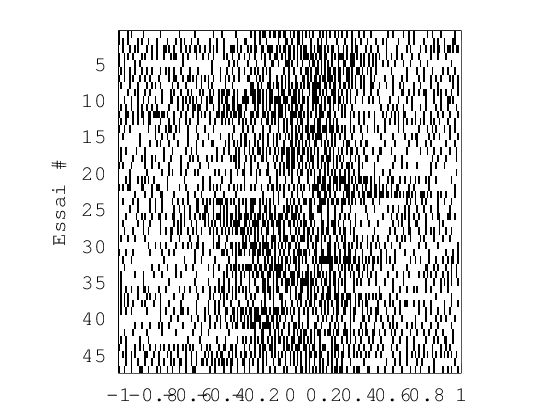

In [7]:
figure                 % nouvelle figure
ddiag(temps_u,essai_u) % Affiche le diagramme de dispersion
xlabel('Temp (sec)');  % Label sur l'axe x
ylabel('Essai #');     % Label sur l'axe y

**Question 1.6.** Ouvrez une nouvelle fenêtre. Faites un diagramme de dispersion en n'utilisant que les 310 premiers temps de décharge. Inclure le code et la figure dans le rapport de laboratoire. Combien d'essais sont inclus dans cette figure?

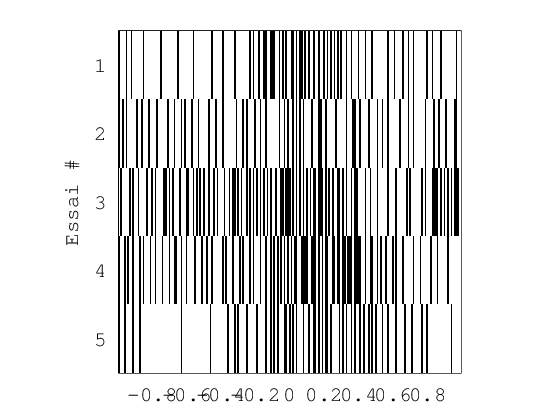

In [8]:
figure                 % nouvelle figure
ddiag(temps_u(1:310),essai_u(1:310)) % Affiche le diagramme de dispersion
xlabel('Temp (sec)');  % Label sur l'axe x
ylabel('Essai #');     % Label sur l'axe y

On voit sur la figure que les temps de décharges comprennent cinq essais. 

**Question 1.7.** Nous allons maintenant utiliser les variables `temps` et `essai`, qui contiennent l'ensemble des 143 neurones enregistrés dans l'expérience. Les essais ont aussi été organisés selon la direction du mouvement du bras. Il n'est pas nécessaire de regarder le type de données utilisé pour stocker `temps` et `essai`, qui va au-delà des objectifs de ce cours. L'instruction suivante effectue une série de huit diagrammes de dispersion spécifique de chaque direction, similaire à la figure du papier de Georgopoulos et al. (1982). Le troisiéme argument de la fonction `ddiag_direc` est le numéro du neurone pour lequel on souhaite afficher le résultat de l'expérience. Quelle est la direction qui semble associée au plus grand nombre de décharges - voir la figure de Georgopoulos et al. (1982) pour une description des directions? Ne pas inclure la figure dans le rapport. 


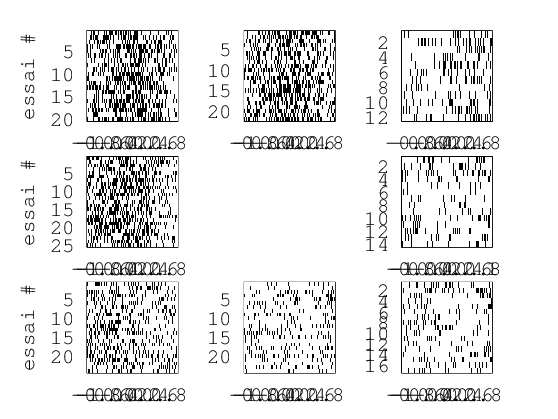

In [9]:
ddiag_direc(temps,essai,129)

Difficile à trancher visuellement entre 90$^\circ$, 135$^\circ$, et 180$^\circ$. Malgré tout on sait que le profil de préférence est en `cos` et que la direction préférée est encadrée par deux autres directions à forte réponse. Seule 135$^\circ$ est un choix viable sous cette hypothése.

<font color="red">**Question 1.8.**</font> Essayez différents neurones, en modifiant le troisiéme paramétre de `ddiag_direc`. Trouver un exemple de neurones pour lequel peu de décharges ont été enregistrées. Trouvez un neurone qui a effectué beaucoup de décharges, préférentiellement dans la direction 3 (90$^\circ$). Nous réutiliserons ces neurones à la fin de la section suivante. Inclure les figures et les instructions dans le rapport. 

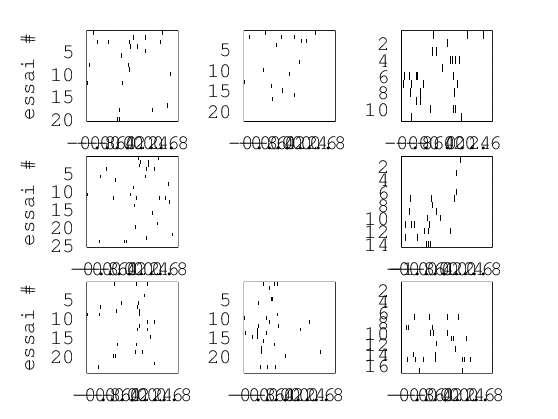

In [10]:
ddiag_direc(temps,essai,3)

Peu de décharges ont été enregistrées pour le site d'enregistrement 3. 

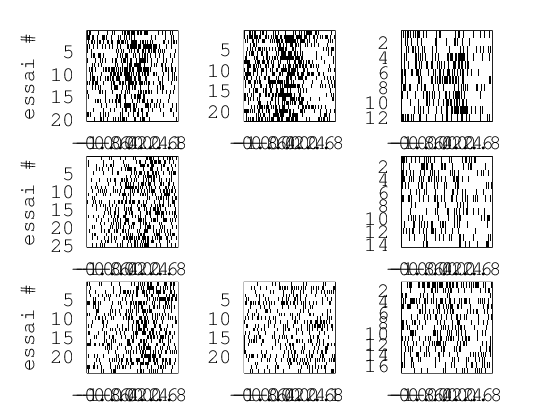

In [11]:
ddiag_direc(temps,essai,105)

Le site d'enregistrement 105 a une direction préférentielle de 90$^\circ$. 

### Section 2: Histogramme de fréquence de décharges

Nous allons continuer l'exploration des données électrophysiologiques à l'aide d'histogrammes de fréquences de décharge. 

**Question 2.1.** Définissons les intervalles de temps de l'histogramme:

In [12]:
inter = -1:0.1:1;

Que signifient les trois valeurs $-1$, $0.1$ et $1$ dans cette instruction? pourquoi avoir choisi $-1$ et $1$? Quelle est la longueur du vecteur `inter`?

L'instruction `a:p:b` en matlab définit un vecteur de valeurs réguliéres allant de la valeur `a` (ici -1) jusqu'à la valeur `b` (ici 1), avec un pas de `p` (ici 0.1). On choisit $-1$ et $1$ parce que ce sont les bornes de la fenêtre de temps d'intérêt autour du début d'un essai. Le nombre de valeurs dans `inter` est donné par: 

In [13]:
length(inter)

ans =  21


**Question 2.2.** On génère maintenant l'histogramme (classique) du nombre de décharges par intervalle de temps. Utilisons l'instruction `bar` pour représenter l'histogramme. Quels sont les valeurs les plus faibles de nombre de décharges? Les valeurs les plus fortes? (on demande des valeurs approximatives, pas exactes). Inclure la figure dans le rapport.  

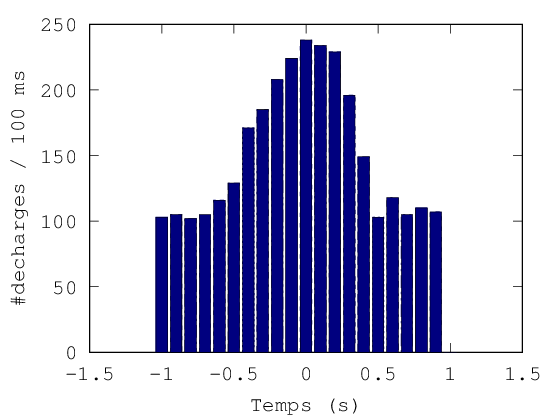

In [14]:
hd = histc(temps_u,inter);
figure
bar(inter,hd)
xlabel('Temps (s)')
ylabel('#decharges / 100 ms')

On voit que le nombre de décharges par intervalle de temps varie entre 100 et 240 (approximativement). 

**Question 2.3.** Nous allons maintenant faire un histogramme de fréquence de décharges, en normalisant l'histogramme classique par la largeur de nos intervalles de temps (0.1 sec).  Quels sont les valeurs les plus faibles de fréquence de décharges? Les valeurs les plus fortes? (on demande des valeurs approximatives, pas exactes). Inclure la figure dans le rapport. 

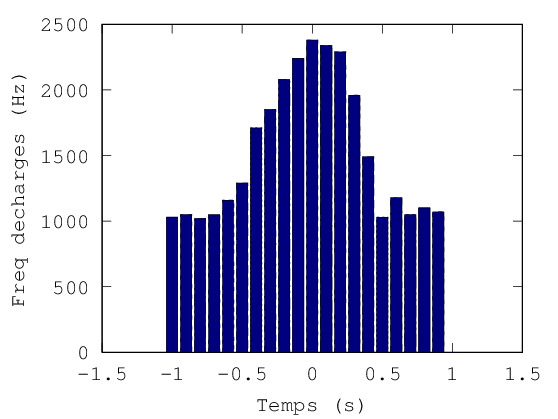

In [15]:
figure
bar(inter,hd/0.1)
xlabel('Temps (s)')
ylabel('Freq decharges (Hz)')

On voit que la fréquence de décharges varie entre 1000 Hz et 2400 Hz (approximativement). 

**Question 2.4.** Recommencer les trois questions précédentes avec des intervalles de temps de 0.01 sec (au lieu de 0.1 sec). Que remarquez vous concernant l'impact de ce paramétre sur les valeurs minimales et maximales du nombre de décharges? et de fréquence de décharge? Commentez l'impact de la largeur de l'intervalle.

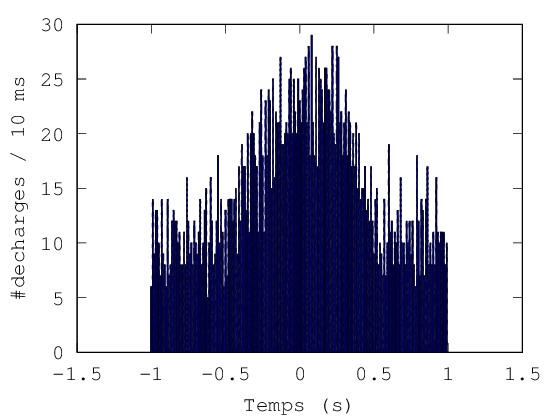

In [16]:
inter = -1:0.01:1;
hd = histc(temps_u,inter);
figure
bar(inter,hd)
xlabel('Temps (s)')
ylabel('#decharges / 10 ms')

On voit que le nombre de décharges min/max chutent à 10/25, ce qui est logique vu que l'on regarde des intervalles de temps 10 fois plus petits. L'histogramme est aussi beaucoup plus bruité.  

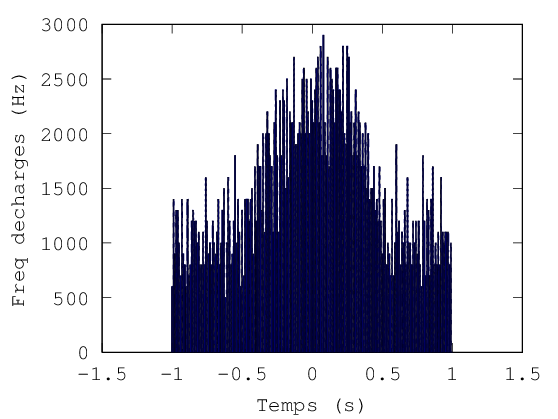

In [17]:
figure
bar(inter,hd/0.01)
xlabel('Temps (s)')
ylabel('Freq decharges (Hz)')

En revanche l'histogramme de fréquences des décharges garde la même unité et les mêmes amplitudes de variations (1000 Hz à 2500 Hz). L'histogramme est plus bruité en travaillant sur des intervalles de 10 ms. 

**Question 2.5.** Nous allons maintenant utiliser à nouveau les variables `temps` et `essai`, cette fois pour faire des histogrammes de fréquence de décharge en fonction de la direction du mouvement. Quel est le pic de fréquence de décharge dans la direction préférée du neurone? et dans la direction la direction opposée à la direction préférée? (on demande des valeurs approximatives). Est ce le pic de décharges est atteint avant ou aprés le début du mouvement dans la direction 180$^{\circ}$? Ne pas inclure la figure dans le rapport. 

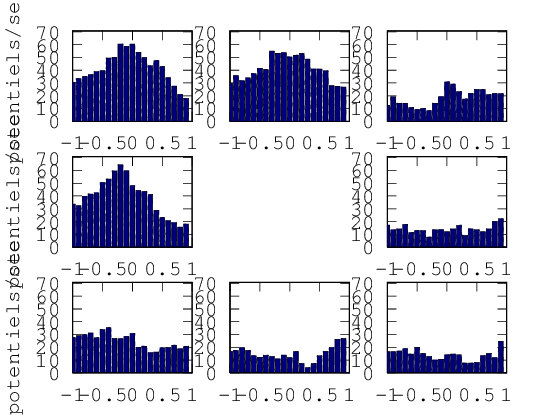

In [19]:
dhist_direc(temps,essai,129)      

Le pic de fréquence de décharges dans la direction préférée (135$^\circ$) est de 60 Hz, et dans la direction opposée (315$^\circ$) il est d'environ 20 Hz. Le pic de décharges dans la direction préférée se situe avant le début du mouvement.

<font color="red">**Question 2.6.**</font> Tracer les histogrammes de fréquence de décharges pour les deux neurones sélectionnés à la fin de la Section précédente. Quels sont les pics de fréquence de décharge dans la direction préférée pour ces deux neurones? et dans les directions adjacentes à leurs directions préférées? (on se contentera de réponses approximatives). Inclure les figures dans le rapport. 

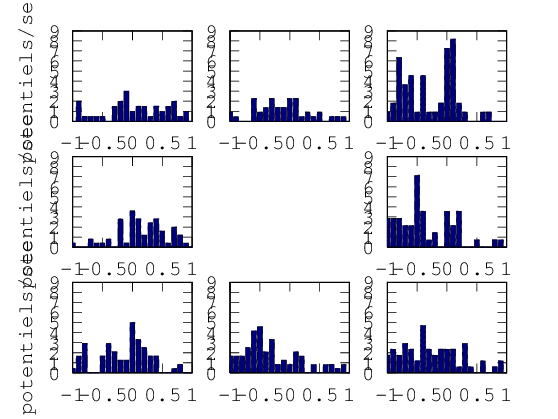

In [20]:
dhist_direc(temps,essai,3) 

Pour le site d'enregistrement numéro 3, on voit un pic à 9 Hz pour un direction de 45$^\circ$. Dans les directions adjacentes, les pics sont de 2 Hz et 8 Hz

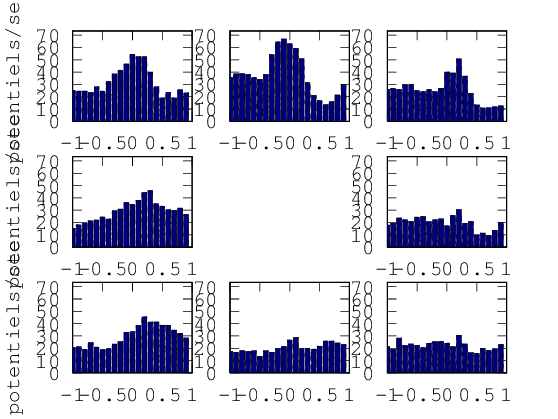

In [21]:
dhist_direc(temps,essai,105)

Pour le site d'enregistrement 105, le pic (à 90$^\circ$) est de 65 Hz. Dans les directions adjacentes les pics sont d'à peu prés 50 Hz. 